# Lesson 8 Intermediate Python for Data Analytics (Finance Performance and Fraudulent Detection)
# Introduction

In here we are going to try to scrape financial data:
* Income statement
* Balance sheet
* Cashflows

## Objective

* To use twippy (Python Library linked with Twitter) to load data from Twitter
* Setting up Twitter Developer account linked to profile
* Initialize Connections and Extracting the presidential election tweets
* To explore Presidential Election Trump vs Hillary from Twitter data 
    * Viewing the data
    * Search Term Analysis
    * Exploring Twitter Trends
* Sentimental Analysis
    * Generating Sentimental Analysis
    * Plotting out Sentimental Analysis
    * How about the news media. How often do they mention the election candidates?
* Topic Analysis
    * Generating Topic with LDA
    * Plotting out Topic Analysis
* Challenges:
    * Analysing fake news
    * Analysing geographic locations sentiments given charts
    * Applying these techniques for companies, commodities, and stocks
* Next lesson:
    * Lesson 6 Basic Python for Data Analytics (Optimization Model for Operations Management)

GeoPandas is an extension of Pandas that integrates a bunch of other Python geo libraries: fiona for input/output of a bunch of different geo file formats, shapely for geodata manipulation, and descartes for generating matplotlib plots, all in the familiar Pandas interface. Corresponding to the Pandas DataFrame is the GeoPandas GeoDataFrame, which is fundamentally the same except for the special geometry column (or GeoSeries) that GeoPandas knows how to manipulate. We’ll see more about geodata manipulation in the next post in the series. For now, let’s quickly generate a plot of the data.

In [6]:
%matplotlib inline

In [3]:
import geopandas as gpd
df = gpd.read_file('../../HeavyDataset/singapore_roads.geojson')

In [4]:
df.shape

(84503, 13)

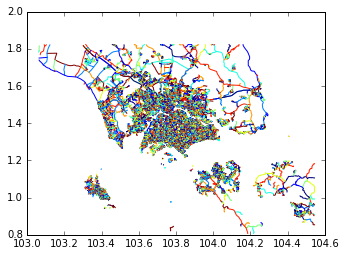

In [7]:
df.plot()

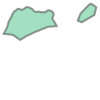

In [10]:
admin_df = gpd.read_file('../../HeavyDataset/singapore_admin.geojson')

#  Inspecting the file we want just the first row
sg_boundary = admin_df.ix[0].geometry

sg_boundary  # In an IPython Notebook, this will plot the Polygon


In [12]:
sg_roads = df[df.geometry.within(sg_boundary)]

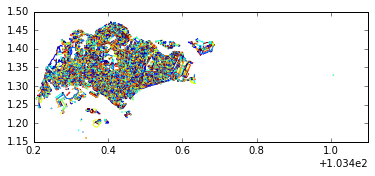

In [13]:
sg_roads.plot()

In [15]:
df.head()

,access,bridge,class,geometry,id,name,oneway,osm_id,ref,service,tunnel,type,z_order
0,None,0,highway,LINESTRING (103.8373191485283 1.31470633286295...,1.0,Sarkies Road,0,9585074.0,None,None,0,residential,3.0
1,None,0,highway,LINESTRING (103.8318304268731 1.30502766544947...,2.0,Paterson Road,1,9585621.0,None,None,0,primary,6.0
2,None,0,highway,LINESTRING (103.8433569686603 1.28958115900519...,3.0,Merchant Loop,1,9590308.0,None,None,0,residential,3.0
3,None,0,highway,LINESTRING (103.8284047430461 1.30686657118670...,4.0,Orchard Road,1,4386520.0,None,None,0,trunk,8.0
4,None,0,highway,LINESTRING (103.8412715511507 1.28860734949449...,5.0,Clemenceau Avenue,1,9590470.0,None,None,0,primary,6.0


In [16]:
import shapely.ops

centroids = df.groupby('name')['geometry'].agg(
                lambda x: shapely.ops.linemerge(x.values).centroid)


In [20]:
centroids = gpd.GeoDataFrame(centroids.reset_index())

ValueError: cannot insert level_0, already exists

In [22]:
centroids = centroids.head(5000)

In [ ]:
from fuzzywuzzy import process
def correct_road(roadname):
    correct_roadnames=df.name
    if roadname in correct_roadnames:  # might want to make this a dict for O(1) lookups
        return roadname, 100

    new_name, score = process.extractOne(roadname, correct_roadnames)
    if score < 90:
        return roadname, score
    else:
        return new_name, score

df['corrected'], df['score'] = zip(*df['name'].apply(correct_road))

In [ ]:
df.c